In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
# making dateTime column as a index for the test_new panda dataframe
test_new = test_new.set_index('dateTime')

In [26]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','RWWIHOB_HWT0','RWWIHOB_MWT0',
#                         'AEWIHO_T9AV2','AEDAHO_T9_V2'] # choose column with which the following work will be conducted

multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','RWWIHOB_HWT0','RWWIHOB_MWT0',
                        'AEDAHO_T9_V2','AEWIHO_T9AV2'] # choose column with which the following work will be conducted

In [27]:
size_column = len(multivariate_column_label)
print(size_column)

6


In [28]:
multivariate_data=test_new.iloc[2000:7000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]

In [29]:
multivariate_data.head()

,DEWIHOBT9_I0,AEDATZ_HO_V0,RWWIHOB_HWT0,RWWIHOB_MWT0,AEDAHO_T9_V2,AEWIHO_T9AV2
dateTime,,,,,,
2019-04-06 00:21:00,100.0,40.574666,94.408986,95.920205,72.427071,76.598087
2019-04-06 00:22:00,100.0,39.990227,94.313021,95.839281,71.620643,76.358689
2019-04-06 00:23:00,100.0,39.577443,94.269031,95.820845,70.606738,77.241097
2019-04-06 00:24:00,100.0,39.685303,94.142675,95.668621,70.531626,77.062413
2019-04-06 00:25:00,100.0,39.782918,93.993123,95.543627,70.692115,76.297974


In [30]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  0


In [31]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

In [32]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [33]:
# print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
dataset=np.array(multivariate_data_drop_zero)

In [34]:
NumberOfElements=int(len(dataset)*0.9)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_input=dataset[0:NumberOfElements,0:-1]
print('train_input shape: ',train_input.shape)
train_output=dataset[0:NumberOfElements,-1]
print('train_output shape: ',train_output.shape)

test_input=dataset[NumberOfElements:len(dataset),0:-1]
print('test_input shape: ',test_input.shape)
test_output=dataset[NumberOfElements:len(dataset),-1]
print('test_output shape: ',test_output.shape)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  4497
dataset length:  4997
train_input shape:  (4497, 5)
train_output shape:  (4497,)
test_input shape:  (500, 5)
test_output shape:  (500,)


In [35]:
from sklearn.ensemble.forest import RandomForestRegressor

In [36]:
RF_Model = RandomForestRegressor(n_estimators=100,max_features=1, oob_score=True)

In [37]:
rgr=RF_Model.fit(train_input, train_output)

In [38]:
predicted_output = rgr.predict(test_input)

In [39]:
print('test_output size: ',test_output.size)
print('predicted output size: ',predicted_output.size)

test_output size:  500
predicted output size:  500


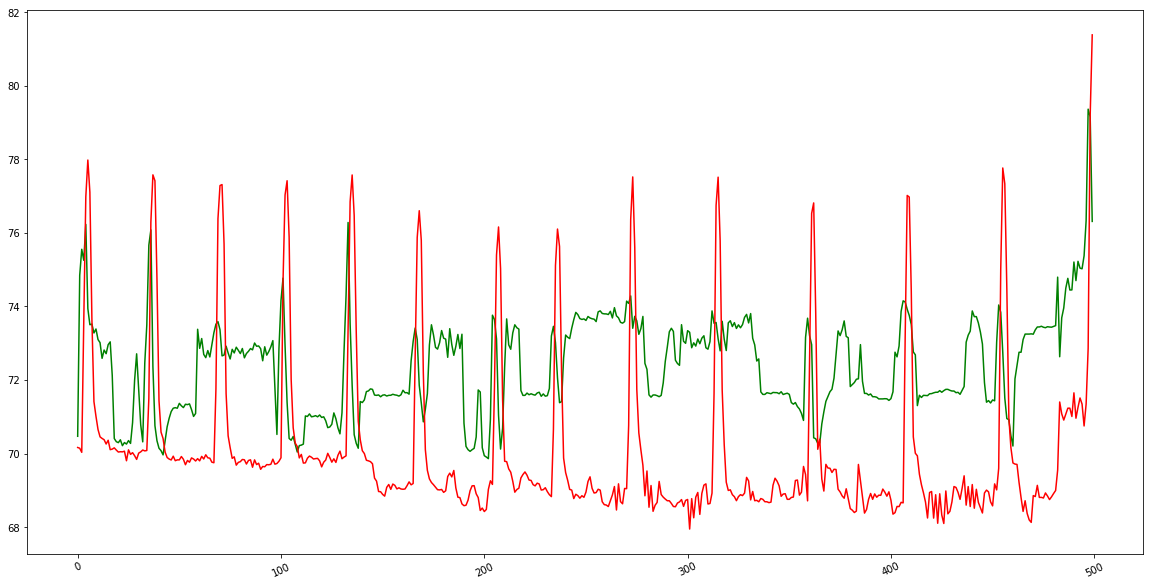

In [40]:
plt.plot(predicted_output,color='green')
plt.plot(test_output,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
# print('Slope:' ,rgr.coef_)
# print('Intercept:', rgr.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

r_2 statistic: -7.14
Mean_absolute_error: 5.51
Mean squared error: 38.31
RMSE:  6.189142519519644


In [41]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
# print('Slope:' ,rgr.coef_)
# print('Intercept:', rgr.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

r_2 statistic: -1.21
Mean_absolute_error: 3.01
Mean squared error: 11.03
RMSE:  3.3210183633380645
